In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pip install wordcloud

In [3]:
data=pd.read_csv("netflix.csv")

In [4]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
data['date_added']=pd.to_datetime(data['date_added'])

In [6]:
data.set_index("show_id", inplace=True)

#### Problem Statement:

Given the extensive dataset of Netflix content, our objective is to analyze the dataset of movies and TV shows available on Netflix to identify patterns, trends, and opportunities that can guide Netflix in its content production strategy. 
Specifically, we aim to address the following questions:

    1.Content Diversity Across Countries:What types of content (genres, languages) are available in different countries? Are there regional preferences or variations in content consumption?
    2.Temporal Trends:How has the number of movies released per year changed over the last 20-30 years?Is there a shift in focus from movies to TV shows or vice versa?
    3.TV Shows vs. Movies:What is the balance between TV shows and movies in Netflix’s content library?Are there differences in viewer engagement or popularity between these two formats?
    4.Optimal Launch Timing:When is the best time to launch a new TV show? Are there seasonal trends?Can we identify patterns related to viewer engagement based on release timing?
    5.Impact of Actors and Directors:How do specific actors and directors influence the success of shows and movies?Are there consistent patterns in terms of ratings or viewership associated with certain talent?

### Observation of the data

In [7]:
# the features (columns) of this data
primary_key = data.index.name
columns = data.columns
print("The primary key or the index of this data is ({}) and its columns are: ".format(primary_key))
for idx, column in enumerate(columns):
    print("{}) {}".format(idx+1, column), end="\n")

The primary key or the index of this data is (show_id) and its columns are: 
1) type
2) title
3) director
4) cast
5) country
6) date_added
7) release_year
8) rating
9) duration
10) listed_in
11) description


In [8]:
data.shape

(8807, 11)

Here we get the shape of the Netflix data which has **8807 rows** and **11 columns**

In [9]:
data.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Here we get the data types of all attributes (columns) in the DataFrame.

In [10]:
data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

It seems that there're some columns with few nulls such as __date_added__ and __rating__, and 3 columns with MANY nulls such as __director__, __cast__ and __country__.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 825.7+ KB


In [12]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Here we get the  statistical summary, which includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for numerical columns in the dataset.

###  Non-Graphical Analysis
Exploring some categorized columns

In [13]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [14]:
data['title'].nunique()

8807

We have 8807 unique titles in our data and also 8807 rows i.e all rows are unique

In [15]:
duplicateRows = data[data.duplicated(["title"])]
duplicateRows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


Nice! There's no duplicated entries.

In [16]:
data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

The country United states has produced most no of movies and next comes India

In [17]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### Visual Analysis

In [18]:
data.drop(columns='description',inplace=True)

Here we are dropping the description column because we dont need that data sor analysis

### Pre processing data
Un-nesting the columns

In [19]:
data['cast'] = data['cast'].str.split(',')
data = data.explode('cast').reset_index(drop=True)

In [20]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
64946,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64947,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64948,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64949,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [21]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
64946,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64947,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64948,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
64949,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [22]:
data['country'] = data['country'].str.split(',')
data = data.explode('country').reset_index(drop=True)

In [23]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
81736,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
81737,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
81738,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
81739,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [24]:
data['director'] = data['director'].str.split(',')
data = data.explode('director').reset_index(drop=True)

In [25]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
89410,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89411,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89412,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89413,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


##### Handling null values

In [26]:
data.isnull().sum()

type                0
title               0
director        21937
cast             1192
country          5421
date_added         69
release_year        0
rating             38
duration            3
listed_in           0
dtype: int64

##### for categorical columns replacing the Nan values with unknown columns name

In [27]:
data['director']=data['director'].fillna('unknown director')
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
89410,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89411,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89412,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89413,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [28]:
data['cast']=data['cast'].fillna('unknown cast')
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
89410,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89411,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89412,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89413,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [29]:
data['country']=data['country'].fillna('unknown country')
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
89410,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89411,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89412,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89413,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [30]:
data[data['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
58419,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown director,Oprah Winfrey,unknown country,2017-01-26,2017,NaN,37 min,Movies
58420,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown director,Ava DuVernay,unknown country,2017-01-26,2017,NaN,37 min,Movies
67231,TV Show,Gargantia on the Verdurous Planet,unknown director,Kaito Ishikawa,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67232,TV Show,Gargantia on the Verdurous Planet,unknown director,Hisako Kanemoto,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67233,TV Show,Gargantia on the Verdurous Planet,unknown director,Ai Kayano,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67234,TV Show,Gargantia on the Verdurous Planet,unknown director,Kana Asumi,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67235,TV Show,Gargantia on the Verdurous Planet,unknown director,Shizuka Ito,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67236,TV Show,Gargantia on the Verdurous Planet,unknown director,Sayaka Ohara,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67237,TV Show,Gargantia on the Verdurous Planet,unknown director,Katsuyuki Konishi,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"
67238,TV Show,Gargantia on the Verdurous Planet,unknown director,Yuka Terasaki,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows"


##### we have rating null values and we are filling the data based on the mode rating of the particular director

In [31]:
director_mode_rating = data.groupby('director')['rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
data['rating'] = data.apply(lambda row: director_mode_rating[row['director']] if pd.isna(row['rating']) else row['rating'], axis=1)

In [32]:
data[data['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
75374,Movie,My Honor Was Loyalty,Alessandro Pepe,Leone Frisa,Italy,2017-03-01,2015,None,115 min,Dramas
75375,Movie,My Honor Was Loyalty,Alessandro Pepe,Paolo Vaccarino,Italy,2017-03-01,2015,None,115 min,Dramas
75376,Movie,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,2017-03-01,2015,None,115 min,Dramas
75377,Movie,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,2017-03-01,2015,None,115 min,Dramas
75378,Movie,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,2017-03-01,2015,None,115 min,Dramas
75379,Movie,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,2017-03-01,2015,None,115 min,Dramas
75380,Movie,My Honor Was Loyalty,Alessandro Pepe,Andreas Segeritz,Italy,2017-03-01,2015,None,115 min,Dramas


#### still we are having none values because this particular director has only one movie and has no rating so we will be keeping the rating as the mode of entire rating column

In [33]:
mode_rating = data['rating'].mode()[0]
data['rating'].fillna(mode_rating, inplace=True)

In [34]:
data['rating'].isna().sum()

0

##### Now we dont have any null values in rating column

In [35]:
data[data['duration'].isna()]
# this is a very small data dropping it doesnot affect out data so dropping them 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
54486,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies
56628,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies
56696,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies


In [36]:
data.dropna(subset=['duration'],inplace=True)

In [37]:
data[data['date_added'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
59283,TV Show,A Young Doctor's Notebook and Other Stories,unknown director,Daniel Radcliffe,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
59284,TV Show,A Young Doctor's Notebook and Other Stories,unknown director,Jon Hamm,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
59285,TV Show,A Young Doctor's Notebook and Other Stories,unknown director,Adam Godley,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
59286,TV Show,A Young Doctor's Notebook and Other Stories,unknown director,Christopher Godwin,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
59287,TV Show,A Young Doctor's Notebook and Other Stories,unknown director,Rosie Cavaliero,United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
...,...,...,...,...,...,...,...,...,...,...
82317,TV Show,The Adventures of Figaro Pho,unknown director,Luke Jurevicius,Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"
82318,TV Show,The Adventures of Figaro Pho,unknown director,Craig Behenna,Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"
82319,TV Show,The Adventures of Figaro Pho,unknown director,Charlotte Hamlyn,Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"
82320,TV Show,The Adventures of Figaro Pho,unknown director,Stavroula Mountzouris,Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [38]:
data.dropna(subset=['date_added'],inplace=True)

In [39]:
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

we have 0 missing values here so proceeding for analysis

In [40]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
89410,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89411,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89412,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
89413,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [41]:
data_unique = data.drop_duplicates(subset='title', keep='first')
data_unique

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
20,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
29,TV Show,Jailbirds New Orleans,unknown director,unknown cast,unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
30,TV Show,Kota Factory,unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
89380,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
89390,TV Show,Zombie Dumb,unknown director,unknown cast,unknown country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
89391,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
89398,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


We are getting this data to analyse the data for type,year added, ratings and country column more accurately

In [42]:
data_unique['year_added']=data_unique['date_added'].dt.year
data_unique['month_added']=data_unique['date_added'].dt.month

### Graphical Analyis

##### Univariate analysis

<Axes: xlabel='year_added', ylabel='count'>

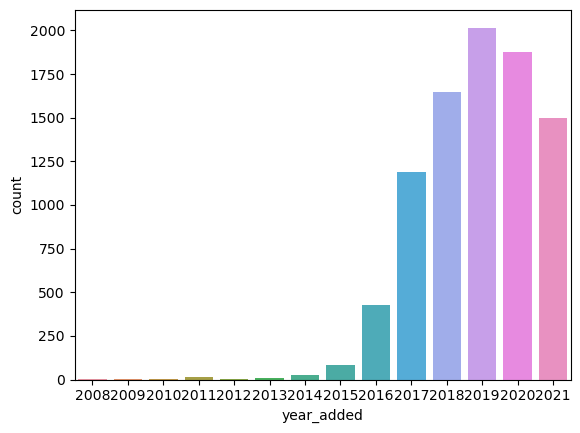

In [43]:
sns.countplot(data=data_unique,x='year_added')

The no of movie and Tv shows released had a rise after **2015** peaked in the year **2018** after that there is a decline after **2020** because we know covid happened during that period

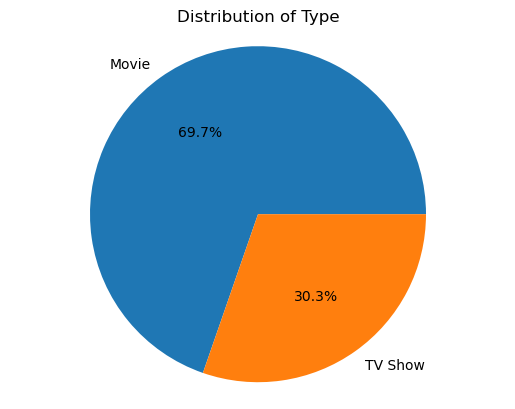

In [44]:
type_counts = data_unique['type'].value_counts()

# Plotting the pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')

# Optionally, you can customize the plot further
plt.title('Distribution of Type')
plt.axis('equal')
plt.show()

Around 71% of the Identifier are Movies and the rest are TV Show which shows majority are Movies

<Axes: xlabel='type', ylabel='count'>

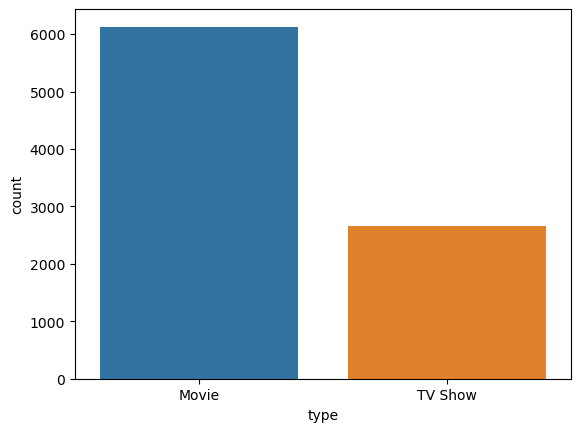

In [45]:
sns.countplot(data=data_unique,x='type')

we can see the movies content is significantly higher than the Tv shows

In [46]:
cast_director_count = data.groupby('cast')['director'].nunique().reset_index(name='director_count').sort_values(by='director_count', ascending=False)

In [47]:
cast_director_count

,cast,director_count
39246,unknown cast,554
1203,Alfred Molina,28
2609,Anupam Kher,27
25246,Radhika Apte,27
24172,Patrick Warburton,24
...,...,...
15257,Joy Mmezi,1
15255,Joy Kate Lawson,1
15254,Joy Gorman,1
15253,Joy Fernandes,1


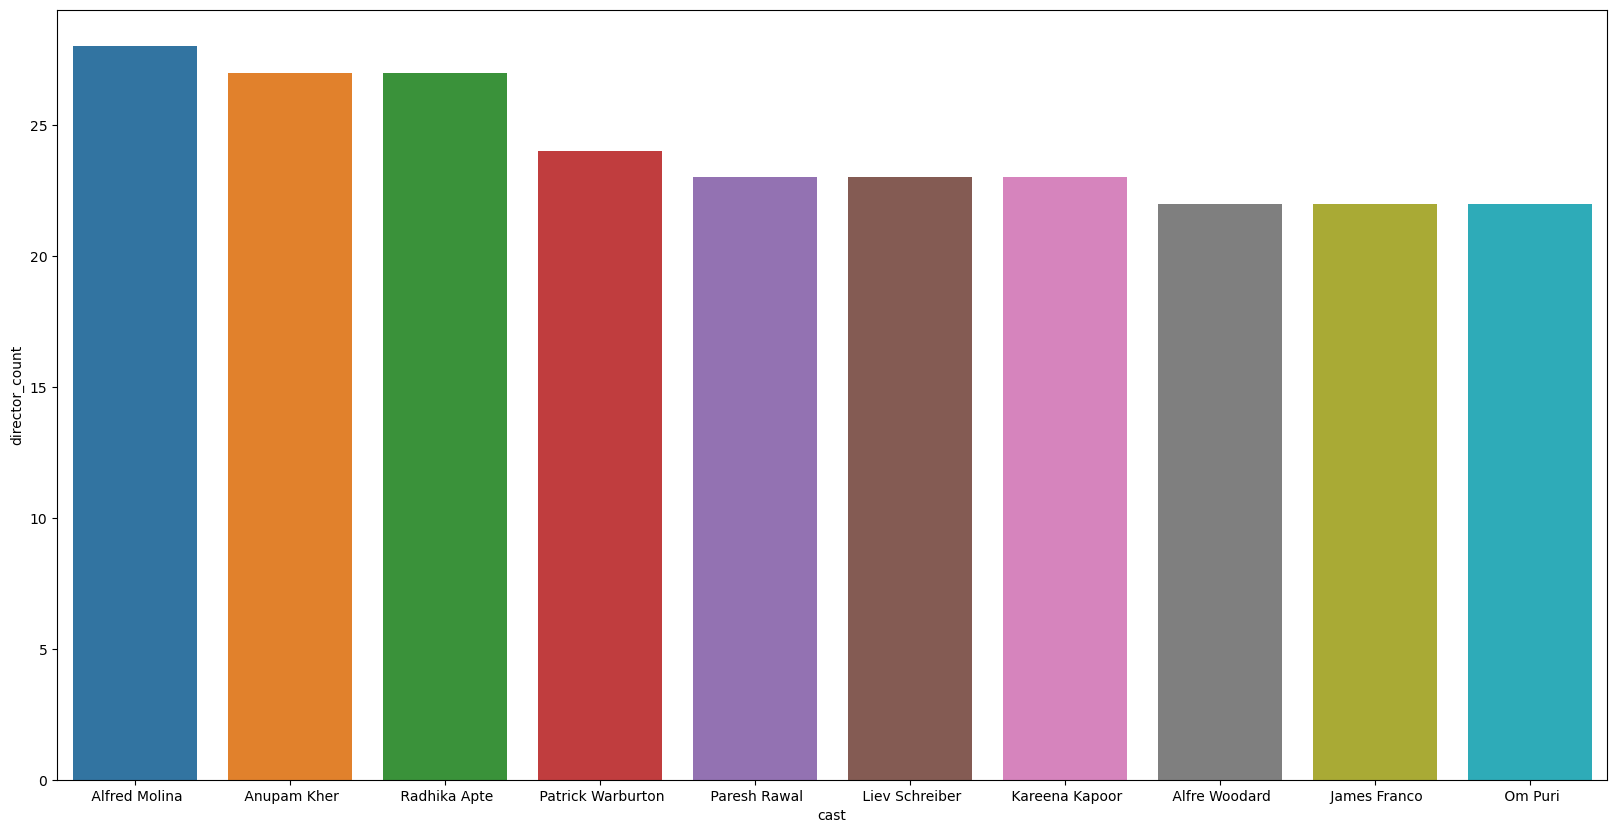

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(data=cast_director_count[1:11],x='cast',y='director_count') # here we are removing unknown cast because those values are missing
plt.show()

We can see the cast **Alfred Molina** has worked with most no of directors and next comes **Anupam Kher & Radhika Apte**

In [49]:
director_movie_count = data.groupby('director')['title'].nunique().reset_index(name='movie_count').sort_values(by='movie_count', ascending=False)

In [50]:
director_movie_count

,director,movie_count
5107,unknown director,2624
4019,Rajiv Chilaka,22
261,Jan Suter,18
4066,Raúl Campos,18
4650,Suhas Kadav,16
...,...,...
2340,J. Davis,1
2341,J. Lee Thompson,1
2342,J. Michael Long,1
609,Smriti Keshari,1


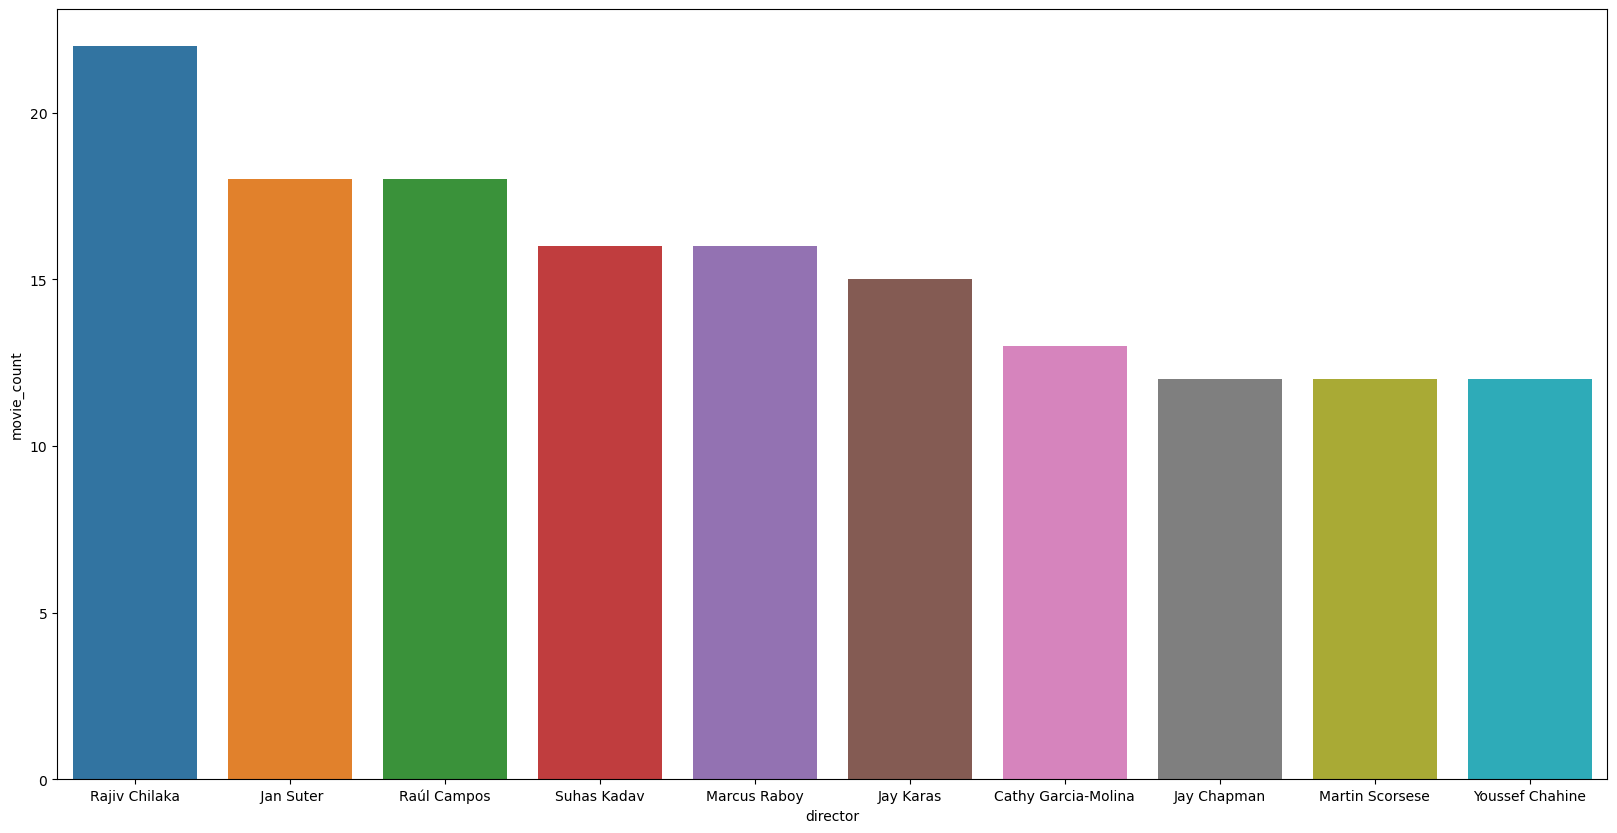

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(data=director_movie_count[1:11],x='director',y='movie_count')
# here we are removing unknown director because those values are missing
plt.show()

We can see the director **Rajiv Chilaka** has directed with most no of movies/Tv shows and next comes **Rajiv Chilaka & Jan Suter**

In [52]:
data_unique = data_unique[data_unique['country'] != 'unknown country']

In [53]:
data_unique['country'].value_counts()

United States     3202
India             1008
United Kingdom     627
Canada             271
Japan              258
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: country, Length: 86, dtype: int64

In [54]:
len(data_unique['country'])

7964

In [55]:
country_data=pd.DataFrame(data_unique['country'].value_counts())
country_data.reset_index()
country_data['Percentage of content in country']=round(country_data['country']/len(country_data['country']),1)
country_data

,country,Percentage of content in country
United States,3202,37.2
India,1008,11.7
United Kingdom,627,7.3
Canada,271,3.2
Japan,258,3.0
...,...,...
Namibia,1,0.0
Senegal,1,0.0
Luxembourg,1,0.0
Syria,1,0.0


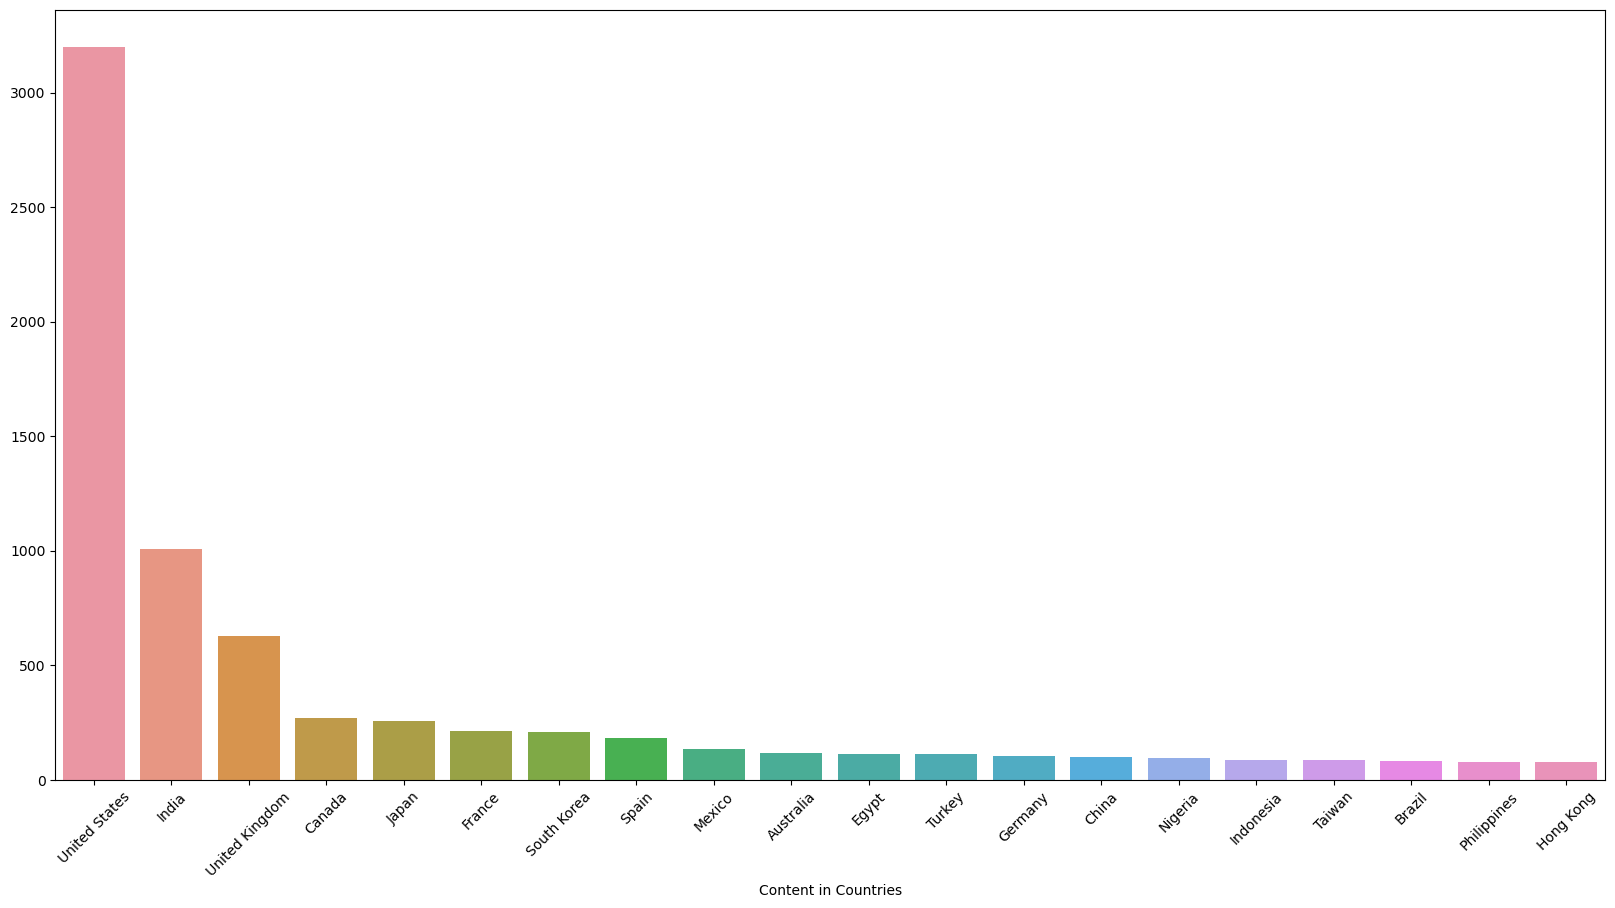

In [56]:
x=data_unique['country'].value_counts().head(20)
plt.figure(figsize=(20,10)) 
sns.barplot(y=x.values,x=x.index)
plt.xticks(rotation=45)
plt.xlabel("Content in Countries")
plt.show()

These are the top 20 countries where the content is produced. The highest no of content is produced by **United States** and next comes **India**, nearly 40% of the content is also by United states

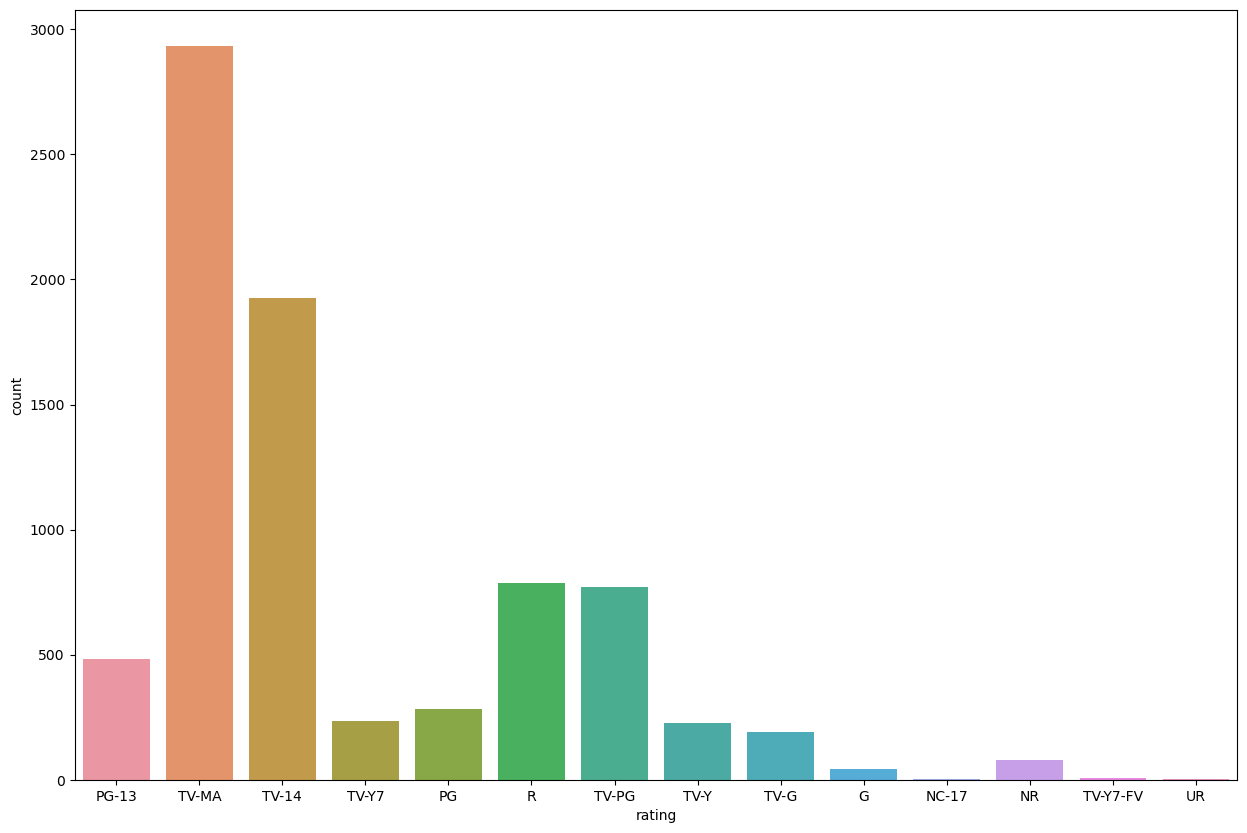

In [57]:
plt.figure(figsize=(15,10)) 
sns.countplot(x=data_unique['rating'])
plt.show()

The chart shows that TV-MA rated content has the highest count. TV-14 rated movies are also quite common.The rating with NC-17 and UR have least no of movies.

In [58]:
data['listed_in'] = data['listed_in'].str.split(',')
data = data.explode('listed_in').reset_index(drop=True)

In [59]:
genre_count=data.groupby('listed_in')['title'].nunique().reset_index(name='count of content per genre').sort_values(by='count of content per genre', ascending=False)
genre_count

,listed_in,count of content per genre
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
...,...,...
59,Romantic Movies,3
62,Spanish-Language TV Shows,2
63,Sports Movies,1
70,TV Sci-Fi & Fantasy,1


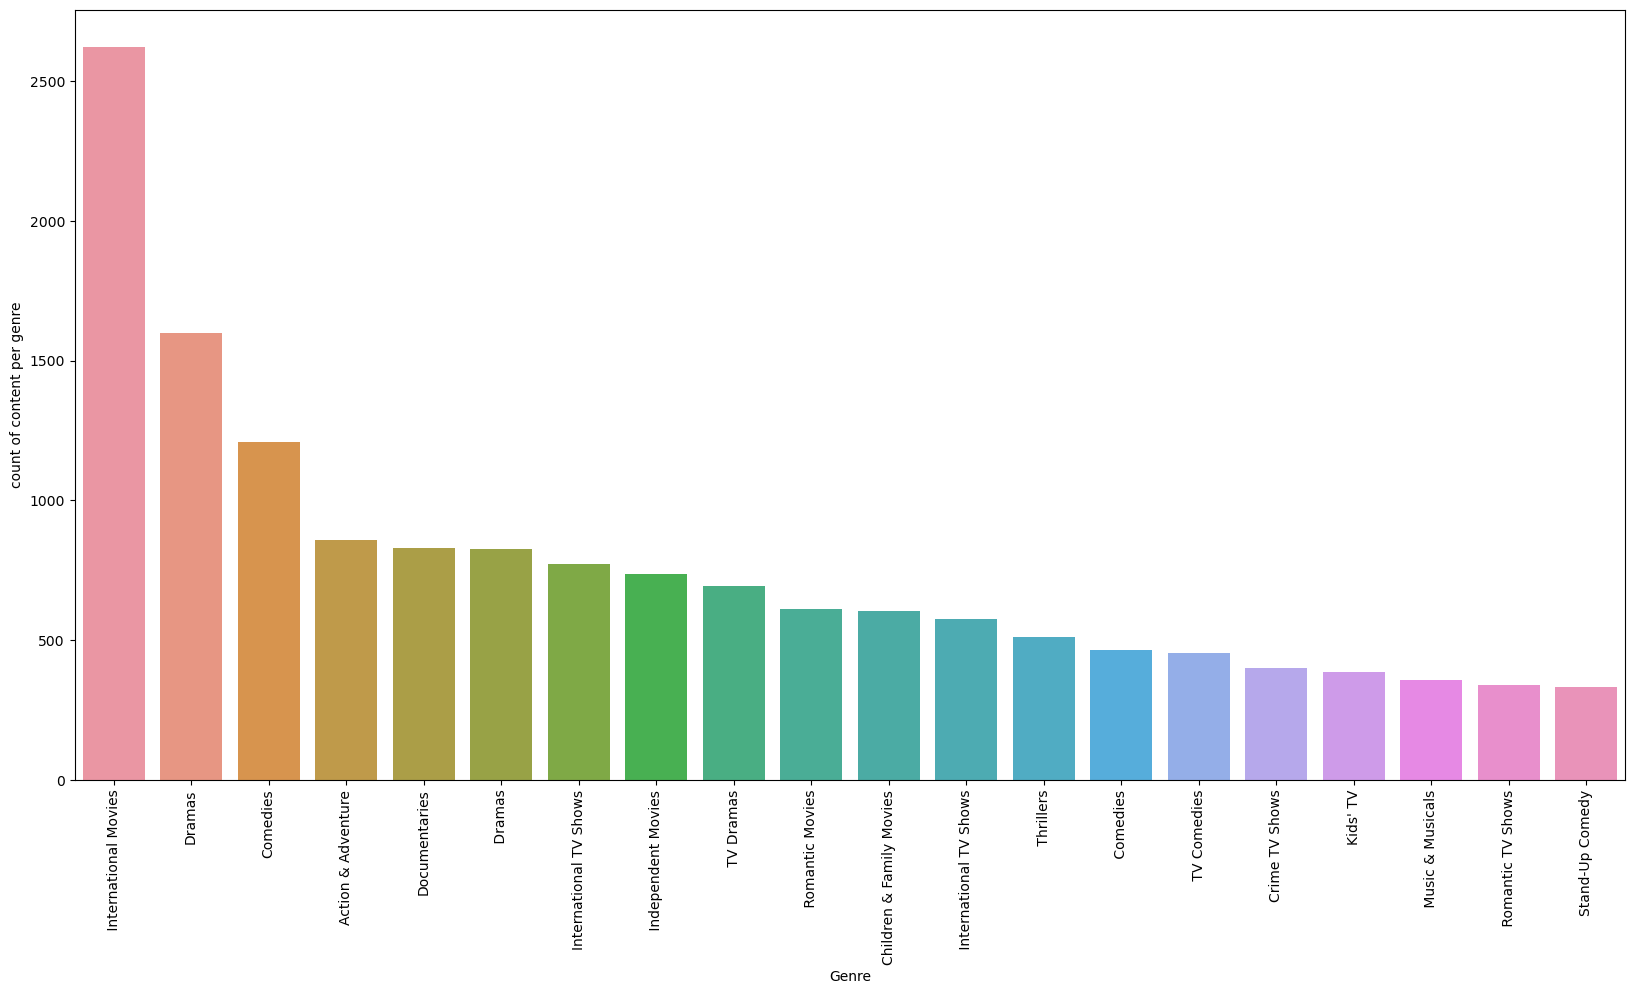

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(data=genre_count.head(20),x='listed_in',y='count of content per genre')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.show()

these are the <mark>Top 20 Genres</mark> in Netflix with **International Movies** being at the top followed by **Dramas** and **comedies**

In [61]:
movie_data=data_unique[data_unique['type']=='Movie']

movie_data['duration'] = movie_data['duration'].str.extract('(\d+)')

# Convert 'duration' column dtype to int
movie_data['duration'] = pd.to_numeric(movie_data['duration'])

movie_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9
74,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,9
126,Movie,The Starling,Theodore Melfi,Melissa McCarthy,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",2021,9
163,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Germany,2021-09-23,2021,TV-MA,127,"Dramas, International Movies",2021,9
261,Movie,Jeans,S. Shankar,Prashanth,India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
89368,Movie,Zinzana,Majid Al Ansari,Ali Suliman,United Arab Emirates,2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",2016,3
89380,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers",2019,11
89391,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",2019,11
89398,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies",2020,1


In [62]:
movie_data['duration'].value_counts()

90     147
94     141
93     139
97     138
95     135
      ... 
193      1
36       1
224      1
10       1
191      1
Name: duration, Length: 197, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

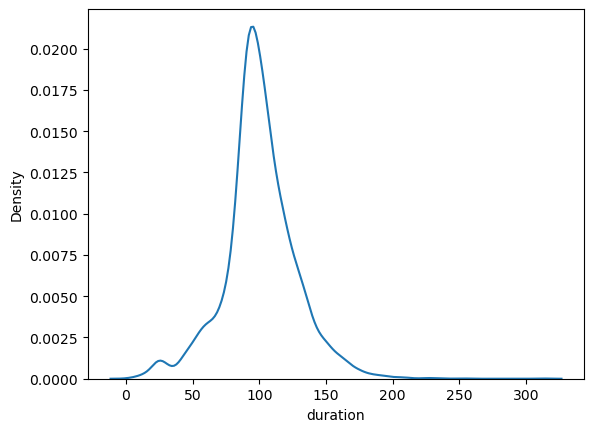

In [63]:
sns.kdeplot(movie_data['duration'])

We find most no of movie around the duration of **90-100** minutes

In [64]:
tvshow_data=data_unique[data_unique['type']=='TV Show']

tvshow_data['duration'] = tvshow_data['duration'].str.extract('(\d+)')

# Convert 'duration' column dtype to int
tvshow_data['duration'] = pd.to_numeric(tvshow_data['duration'])

tvshow_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9
30,TV Show,Kota Factory,unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9
122,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",2021,9
196,TV Show,Dear White People,unknown director,Logan Browning,United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas",2021,9
206,TV Show,Falsa identidad,unknown director,Luis Ernesto Franco,Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
89114,TV Show,Yo-Kai Watch,unknown director,Johnny Yong Bosch,United States,2016-04-01,2015,TV-Y7,1,"Anime Series, Kids' TV",2016,4
89285,TV Show,Yu-Gi-Oh! Arc-V,unknown director,Mike Liscio,Japan,2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV",2018,5
89295,TV Show,Yunus Emre,unknown director,Gökhan Atalay,Turkey,2017-01-17,2016,TV-PG,2,"International TV Shows, TV Dramas",2017,1
89313,TV Show,Zak Storm,unknown director,Michael Johnston,United States,2018-09-13,2016,TV-Y7,3,Kids' TV,2018,9


In [65]:
tvshow_data['duration'].value_counts()

1     1458
2      383
3      187
4       92
5       63
6       33
7       22
8       16
9        8
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

<Axes: xlabel='duration', ylabel='count'>

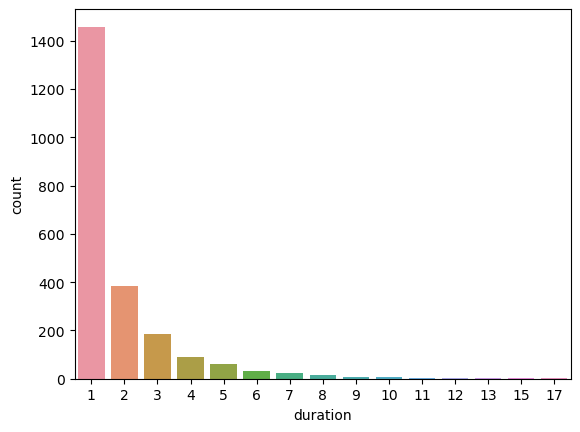

In [66]:
sns.countplot(data=tvshow_data,x='duration')

We find the most of the TV shows have only a **single season** and only 2 TV shows have a single season

In [67]:
genre_count=data.groupby('listed_in')['title'].nunique().reset_index(name='count of content per genre').sort_values(by='count of content per genre', ascending=False)
genre_count

,listed_in,count of content per genre
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
...,...,...
59,Romantic Movies,3
62,Spanish-Language TV Shows,2
63,Sports Movies,1
70,TV Sci-Fi & Fantasy,1


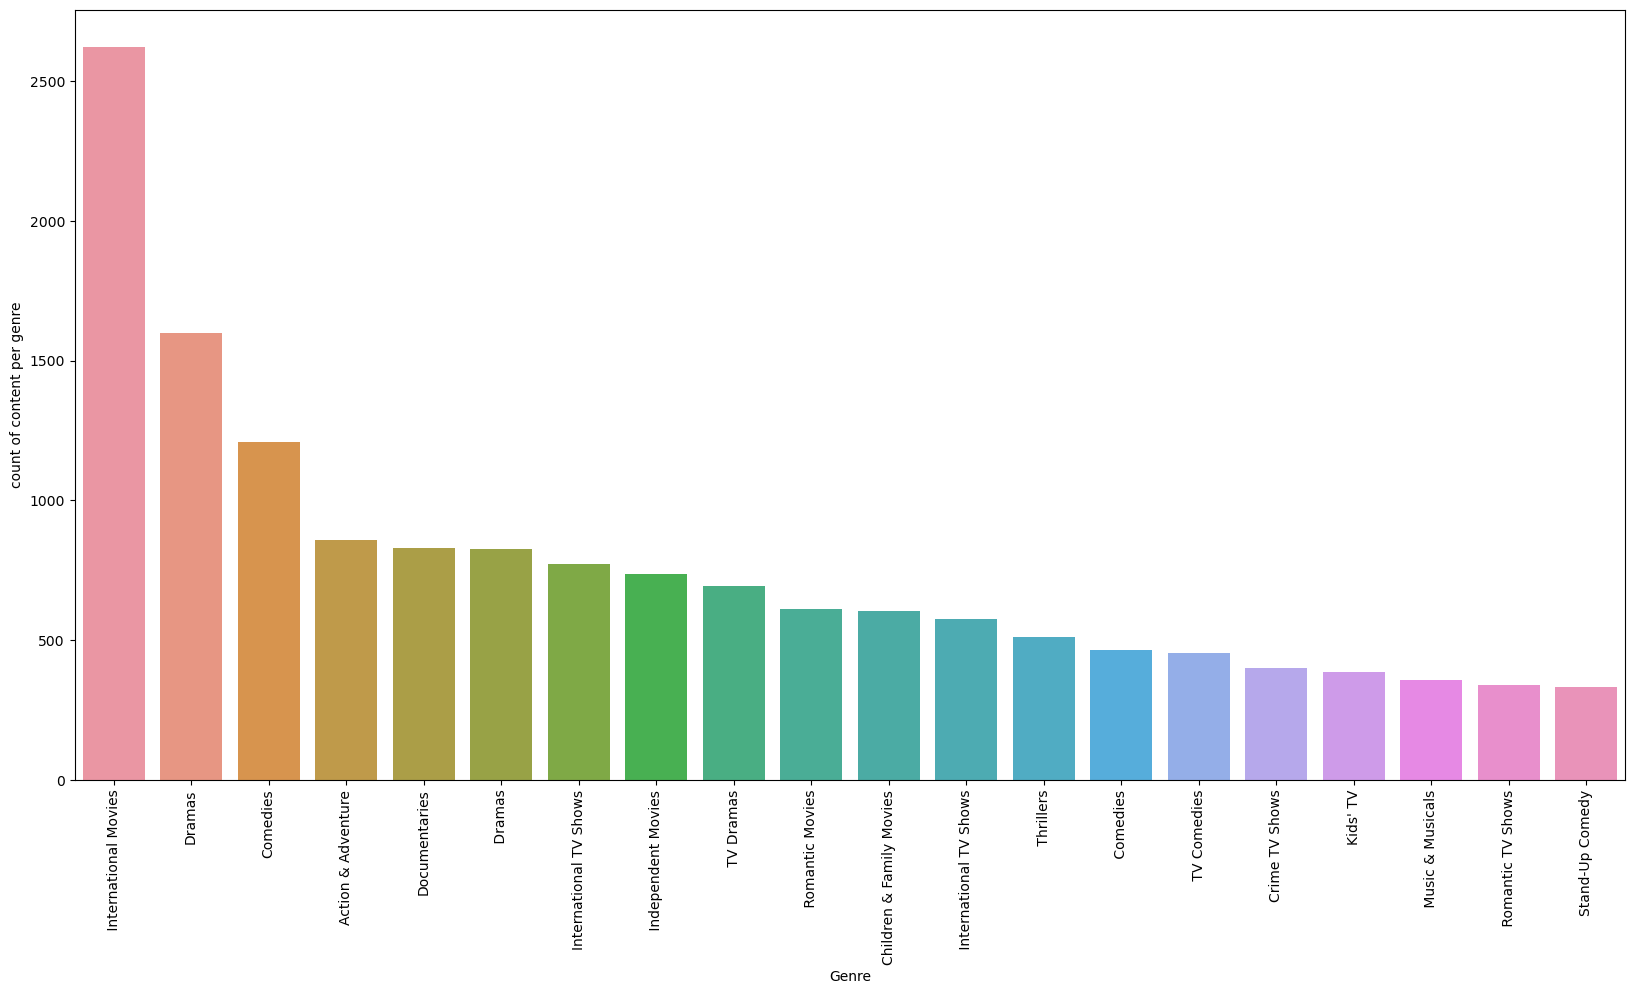

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(data=genre_count.head(20),x='listed_in',y='count of content per genre')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.show()

these are the <mark>Top 20 Genres</mark> in Netflix with **International Movies** being at the top followed by **Dramas** and **comedies**

##### Bivariate analysis

In [69]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...
201899,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies
201900,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals
201901,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas
201902,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies


In [70]:
def count_countires(countries_df):
    '''
    This function just counts the number of countries appears in each entry and returns the dictionary which contains this information
    :param countries_df -> the dataframe which I need to count the countries appear in it
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [71]:
movies_countries = data_unique[data_unique["type"]=="Movie"]["country"]
shows_countries = data_unique[data_unique["type"]=="TV Show"]["country"]

movies_dict = count_countires(movies_countries)
shows_dict = count_countires(shows_countries)

# to see the results in a dataframe
movies = pd.DataFrame(movies_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

shows = pd.DataFrame(shows_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)


# as we see, the order is not the same in both movies and tv shows dataframes.
# to solve this and get more consistent resuts I merge the 2 dataframes

all_contents = movies.merge(shows, how="outer", on="Country").head(10)
all_contents.rename(columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, inplace=True)
all_contents = all_contents.astype({"Number of Movies":'int64', "Number of TV Shows":'int64'})
display((all_contents))

,Country,Number of Movies,Number of TV Shows
0,United States,2361,841
1,India,927,81
2,United Kingdom,382,245
3,Canada,187,84
4,France,148,64
5,Spain,129,52
6,Egypt,98,14
7,Nigeria,87,9
8,Mexico,86,48
9,Japan,85,173


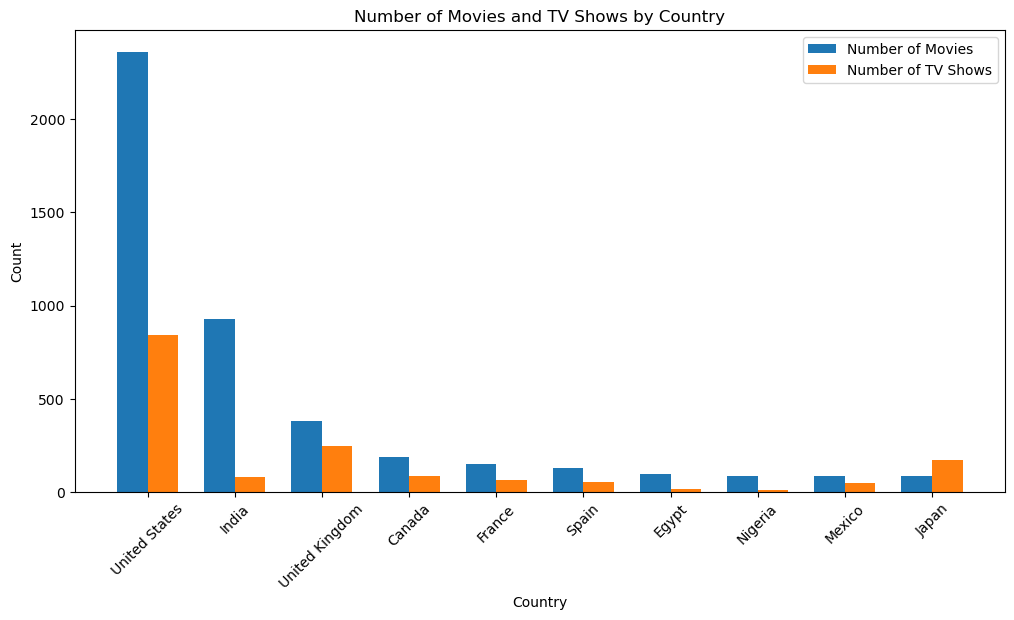

In [72]:
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Positions of bars on x-axis
r1 = range(len(all_contents))

# Plot bars
plt.bar(r1, all_contents['Number of Movies'], width=bar_width, label='Number of Movies')
plt.bar([x + bar_width for x in r1], all_contents['Number of TV Shows'], width=bar_width, label='Number of TV Shows')

# X-axis labels
plt.xlabel('Country')
plt.xticks([r + bar_width/2 for r in r1], all_contents['Country'], rotation=45)

# Y-axis label
plt.ylabel('Count')

# Title
plt.title('Number of Movies and TV Shows by Country')
plt.legend()
plt.show()

This is a combined graph for top 10 countries having high nof of movies anf Tv shows

In [73]:
director_data=data_unique[data_unique['director']!='unknown director'].reset_index()
director_data_=director_data.groupby('type')['director'].nunique().reset_index(name='count of directors per type').sort_values(by='count of directors per type', ascending=False)
director_data_

,type,count of directors per type
0,Movie,4035
1,TV Show,179


###### No of Unique directors per type of content

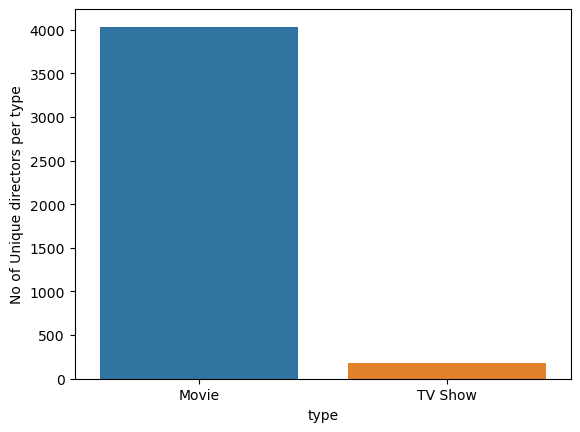

In [74]:
sns.barplot(data=director_data_,x='type',y='count of directors per type')
plt.ylabel("No of Unique directors per type")
plt.show()

There are around 4000 unique directors for movies and 180 directors for Tv shows

In [75]:
director_data=data_unique[data_unique['director']!='unknown director'].reset_index()
director_country_data=director_data.groupby('director')['country'].nunique().reset_index(name='country count').sort_values(by='country count', ascending=False)
director_country_data

,director,country count
3177,Raúl Campos,4
1723,Jerry Rothwell,3
1183,Fernando Ayllón,3
3237,Ricky Gervais,3
2523,Matías Gueilburt,3
...,...,...
1418,Harold Becker,1
1419,Harold Cronk,1
1420,Harrison Smith,1
1421,Harry Baweja,1


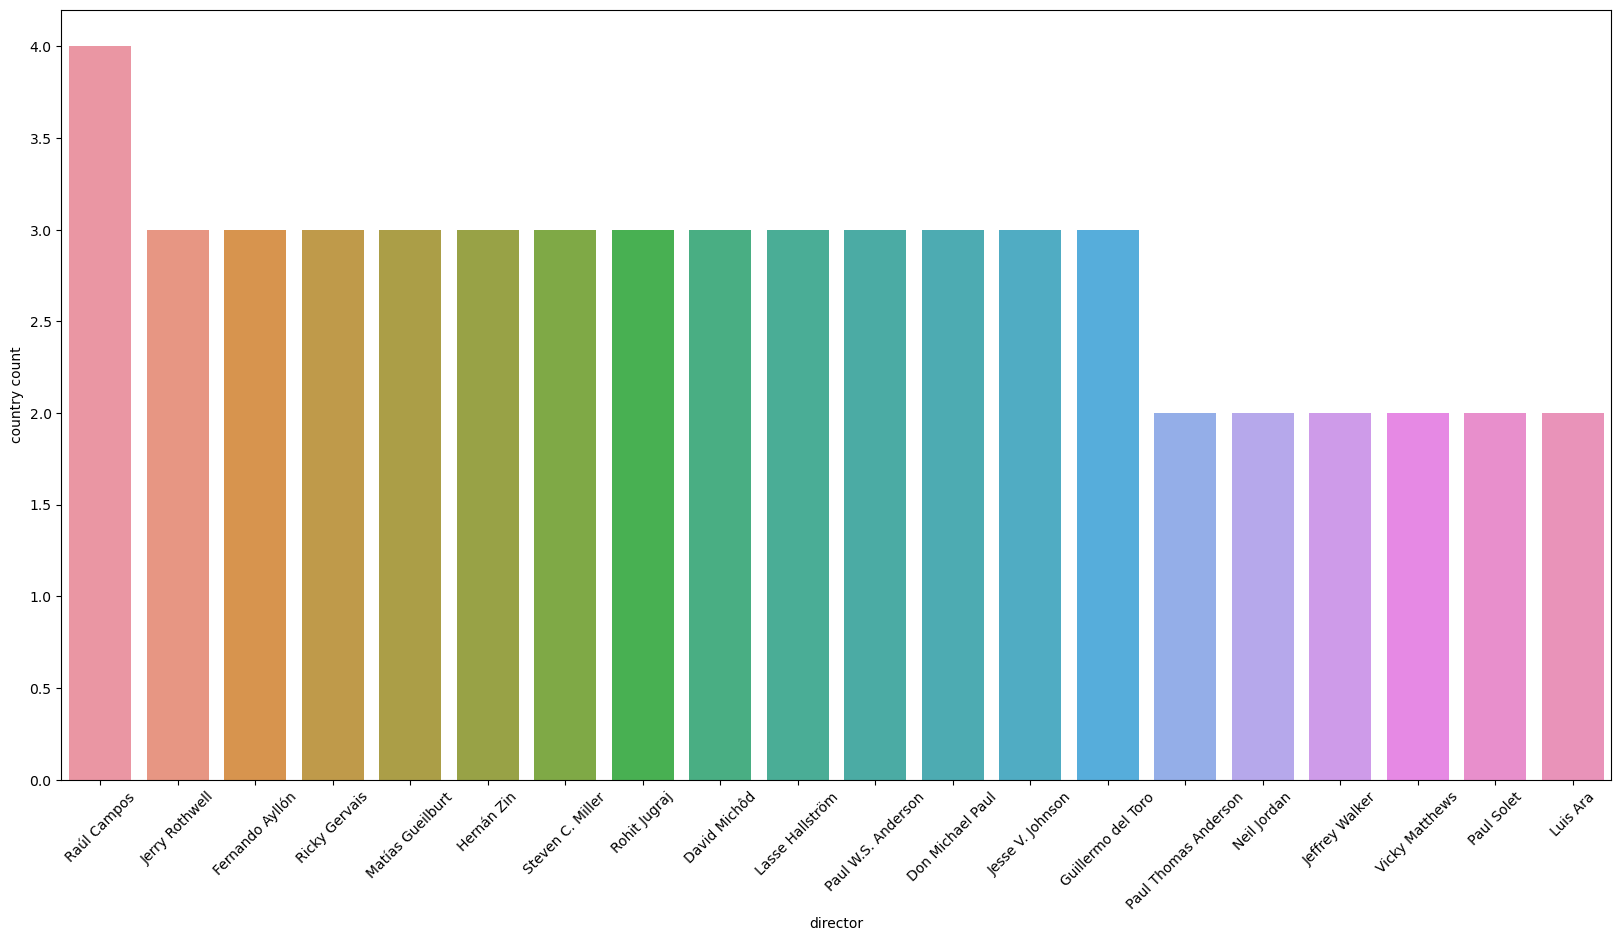

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(data=director_country_data[:20],x='director',y='country count')
plt.xticks(rotation=45)
plt.show()

Raúl Campos is the only director where his movie is produced in 4 different countries and there are few more directors who's movie is produced in 3 different countries

In [77]:
cast_data=data_unique[data_unique['cast']!='unknown cast'].reset_index()
cast_country_data=cast_data.groupby('cast')['country'].nunique().reset_index(name='country count').sort_values(by='country count', ascending=False)
cast_country_data

,cast,country count
2129,Jessica Chastain,5
4180,Scott Adkins,4
83,Adrien Brody,4
1768,Helen Mirren,4
1370,Emma Roberts,4
...,...,...
1730,Harley Quinn Smith,1
1729,Harith Iskander,1
1728,Harish Verma,1
1727,Hari Kondabolu,1


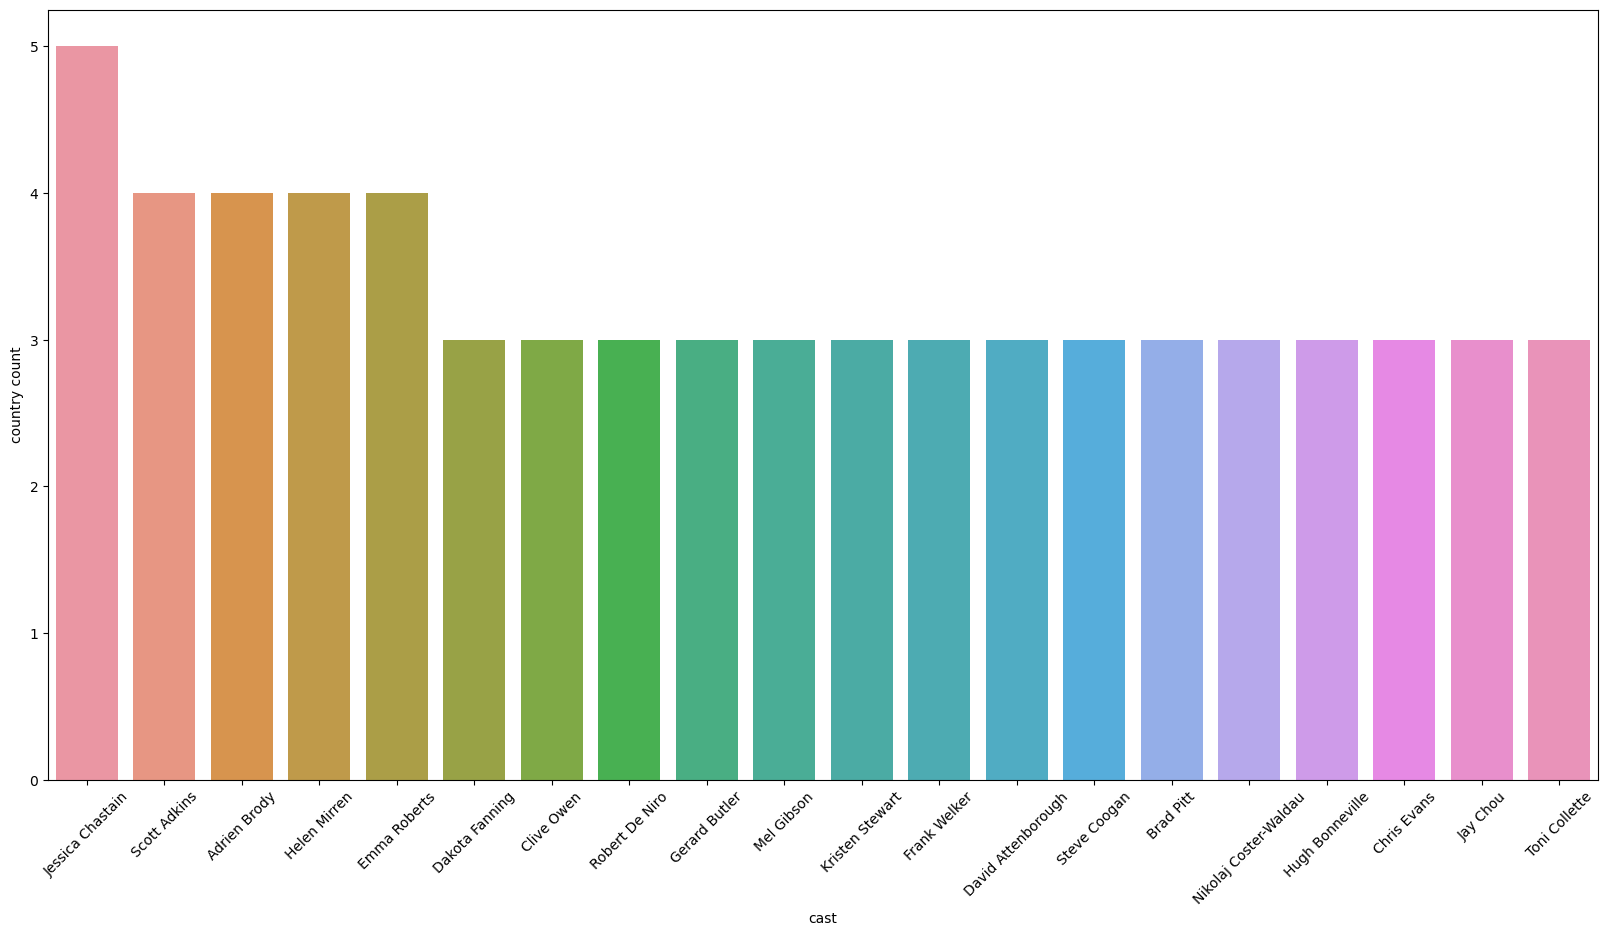

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(data=cast_country_data[:20],x='cast',y='country count')
plt.xticks(rotation=45)
plt.show()

Jessica Chastain is the only Actor whose movie is produced in 5 different countries and Scott Adkins,Adrien Brody,Helen Mirren and Emma Roberts are the actors whose movie is produced in 5 different countries

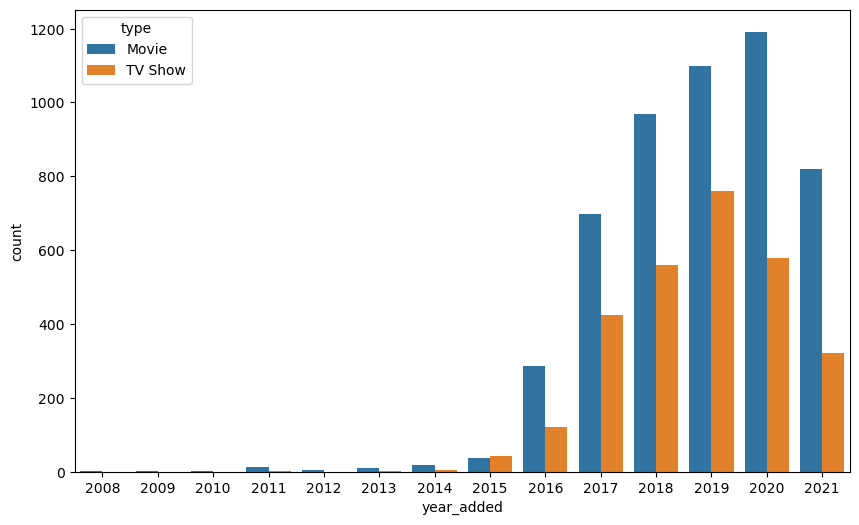

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data_unique['year_added'],hue=data['type'])
plt.show()

This is a countplot for data spans from <mark>2008 to 2021</mark>, showing the count of **movies and TV shows** added each year. The count for <mark>movies is consistently higher than that for TV shows</mark> across the years. There is a noticeable increase in the count for both categories starting from around 2016, with the peak for movies in 2020 and for TV shows in 2019.

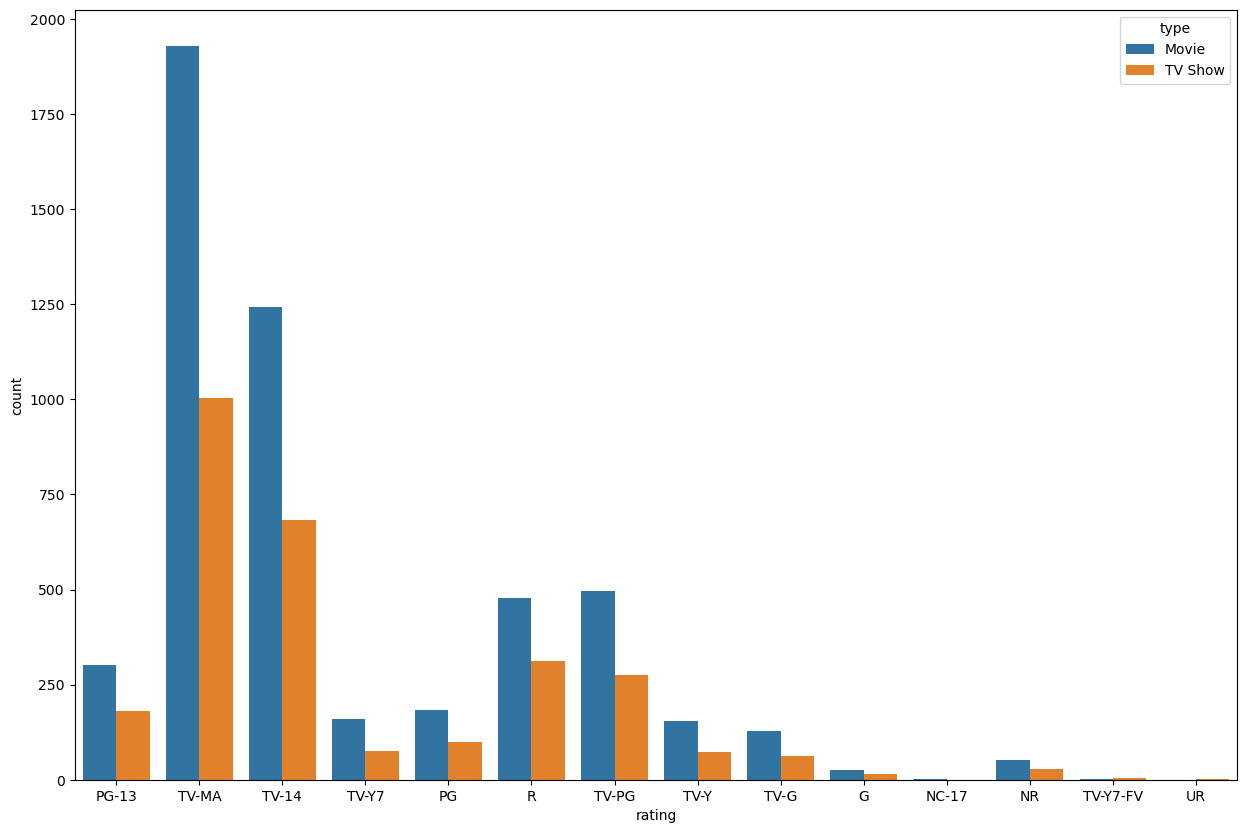

In [80]:
plt.figure(figsize=(15,10)) 
sns.countplot(x=data_unique['rating'],hue=data['type'])
plt.show()

The chart shows that TV-MA rated content has the highest count for both movies and TV shows, with movies having a significantly higher count than TV shows. TV-14 rated movies are also quite common, where the count of movies is generally higher than that of TV shows.

In [81]:
movie_data['duration'].mean()

100.52056962025317

In [82]:
movie_genre_count=movie_data.groupby('listed_in')['duration'].mean().reset_index(name='Avg duration').sort_values(by='Avg duration', ascending=False)

movie_genre_count['listed_in'] = movie_genre_count['listed_in'].str.split(',')
movie_genre_count = movie_genre_count.explode('listed_in').reset_index(drop=True)
movie_genre_count

,listed_in,Avg duration
0,Classic Movies,173.0
1,Music & Musicals,173.0
2,Action & Adventure,172.0
3,Cult Movies,172.0
4,Dramas,172.0
...,...,...
707,Comedies,46.0
708,LGBTQ Movies,46.0
709,Action & Adventure,40.0
710,Documentaries,40.0


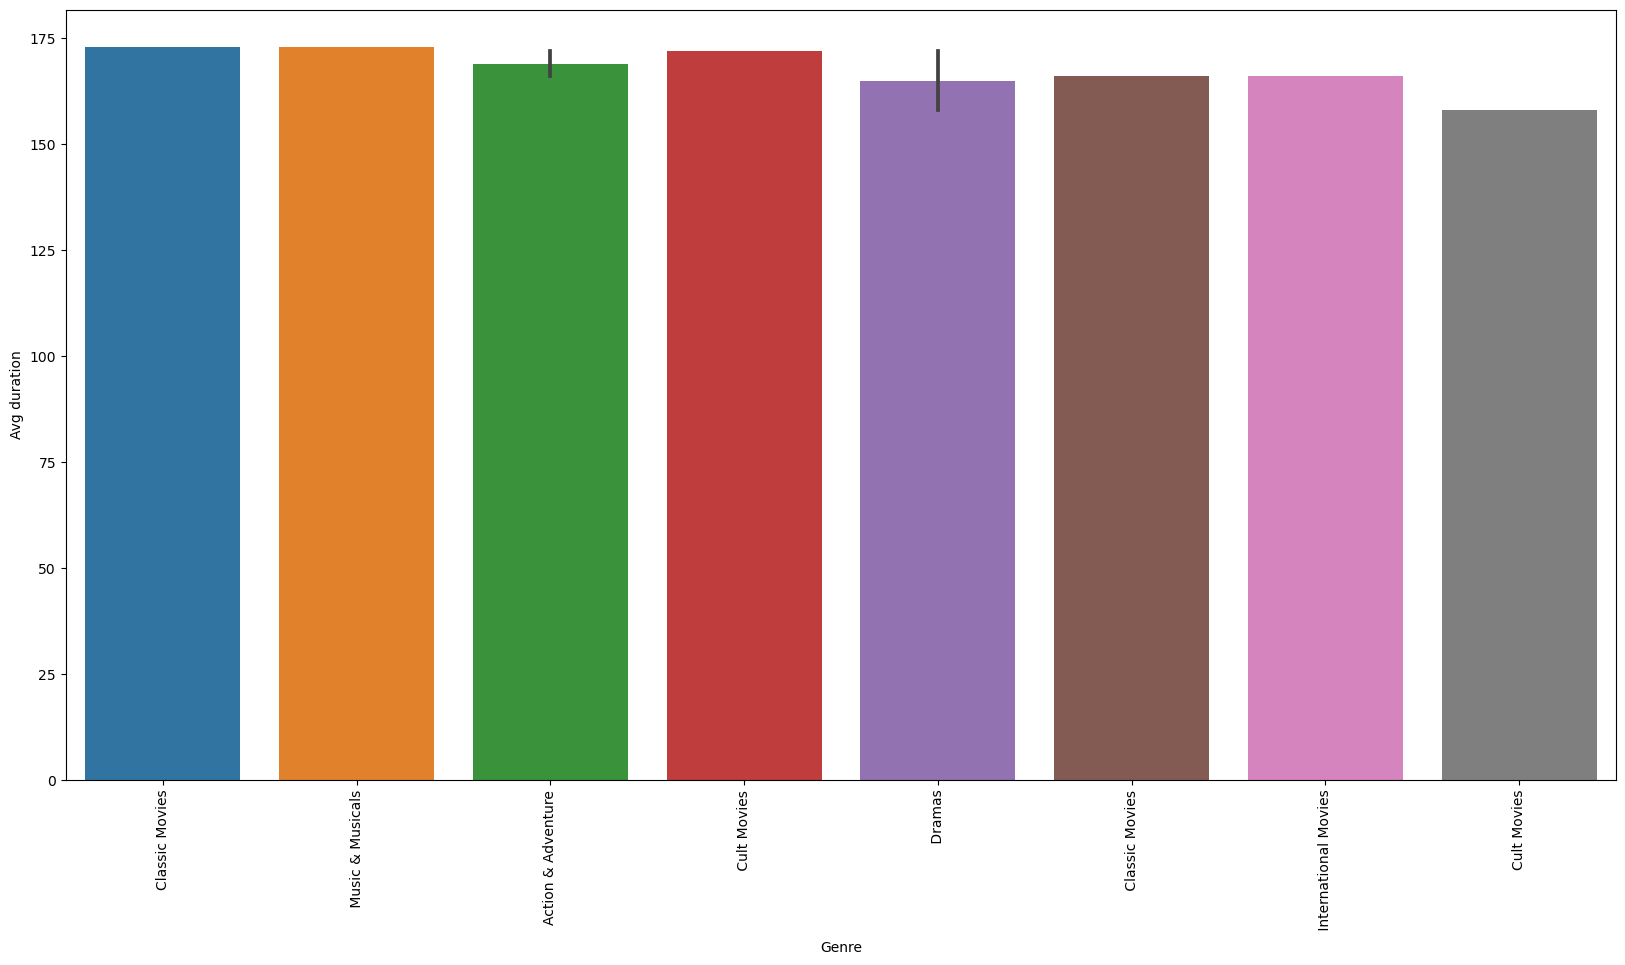

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(data=movie_genre_count.head(10),x='listed_in',y='Avg duration')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.show()

these are the <mark>Top 10 Genres</mark> in Netflix <mark>Movies</mark> with the highest average duration **cult classic and Music & Musicals** being at the top followed by **Action & Adventure** and **Cult movies**.
**Documenteries and sports movies** have the least average duration

In [84]:
tvshow_data['duration'].mean()

1.8400702987697715

In [85]:
tvshow_genre_count=tvshow_data.groupby('listed_in')['duration'].mean().reset_index(name='Avg duration').sort_values(by='Avg duration', ascending=False)

tvshow_genre_count['listed_in'] = tvshow_genre_count['listed_in'].str.split(',')
tvshow_genre_count = tvshow_genre_count.explode('listed_in').reset_index(drop=True)
tvshow_genre_count

,listed_in,Avg duration
0,Classic & Cult TV,9.0
1,TV Action & Adventure,9.0
2,TV Horror,9.0
3,Classic & Cult TV,8.0
4,TV Comedies,8.0
...,...,...
595,International TV Shows,1.0
596,International TV Shows,1.0
597,Kids' TV,1.0
598,TV Mysteries,1.0


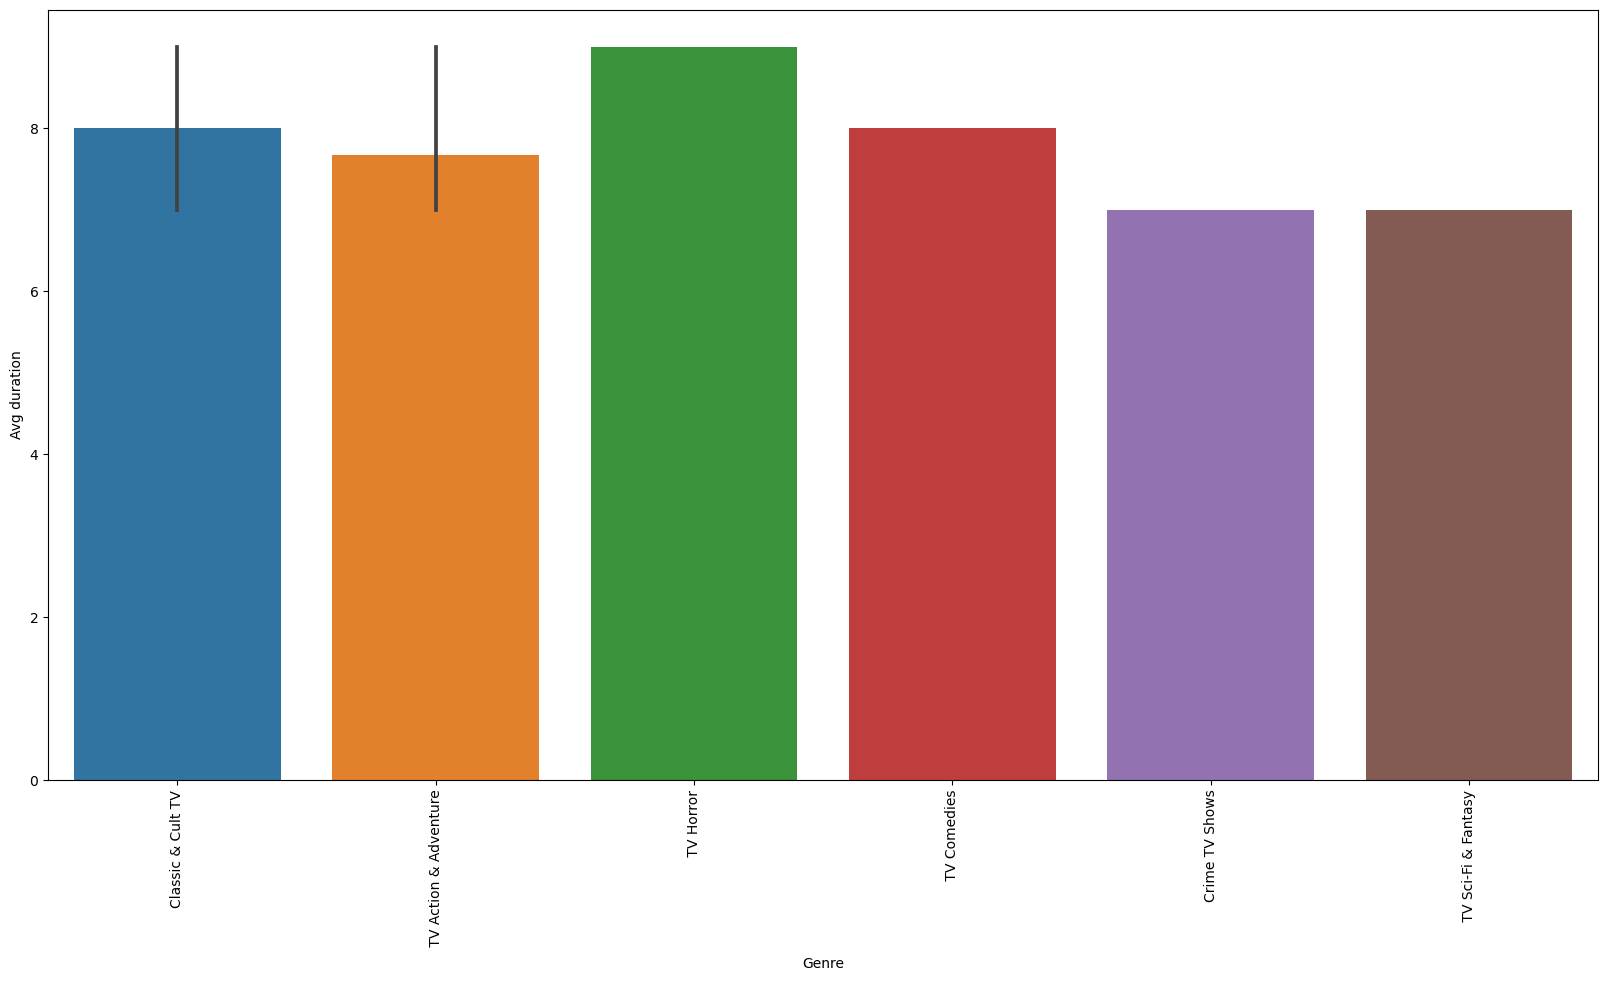

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(data=tvshow_genre_count.head(10),x='listed_in',y='Avg duration')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.show()

these are the <mark>Top 10 Genres</mark> in Netflix <mark>Tv shows</mark> with the highest average seasons, **Classic & Cult TV** being at the top with 5 seasons followed by **TV Comedies** this indicates that these geners are being most watched so new seasons are made.

In [87]:
director_duration_count=movie_data.groupby('director')['duration'].mean().reset_index(name='Avg duration').sort_values(by='Avg duration', ascending=False)
director_duration_count

,director,Avg duration
1423,Houssam El-Din Mustafa,253.0
3317,Samir Al Asfory,237.0
891,David Lean,200.0
3412,Sergio Leone,197.5
424,Bassam Kurdali,196.0
...,...,...
2401,Mathieu Auvray,12.0
1182,Frank E. Abney III,9.0
343,Arnon Manor,8.0
97,Akira Saitoh,5.0


The director Houssam El-Din Mustafa has the movies with highest duration time where as Limbert Fabian has the least duration

<Axes: xlabel='type', ylabel='year_added'>

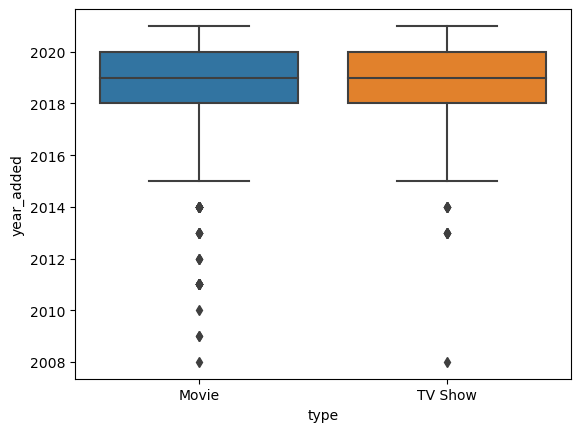

In [88]:
sns.boxplot(data=data_unique,y='year_added',x='type')

Median year added for movies is around 2016.
The interquartile range (IQR) indicates that half of the movies were added between approximately 2014 and 2018.

Median year added for TV shows is around 2020, indicating more recent additions compared to movies.
The IQR shows that half of the TV shows were added between approximately 2019 and 2020.


In [89]:
df = pd.concat([tvshow_data,movie_data])
df.reset_index()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9
1,30,TV Show,Kota Factory,unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9
2,122,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",2021,9
3,196,TV Show,Dear White People,unknown director,Logan Browning,United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas",2021,9
4,206,TV Show,Falsa identidad,unknown director,Luis Ernesto Franco,Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,89368,Movie,Zinzana,Majid Al Ansari,Ali Suliman,United Arab Emirates,2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",2016,3
7960,89380,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers",2019,11
7961,89391,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",2019,11
7962,89398,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies",2020,1


In [90]:
correlation_matrix = df.corr()
correlation_matrix

,release_year,duration,year_added,month_added
release_year,1.000000,-0.246103,0.088170,-0.040635
duration,-0.246103,1.000000,0.034495,-0.014621
year_added,0.088170,0.034495,1.000000,-0.162950
month_added,-0.040635,-0.014621,-0.162950,1.000000


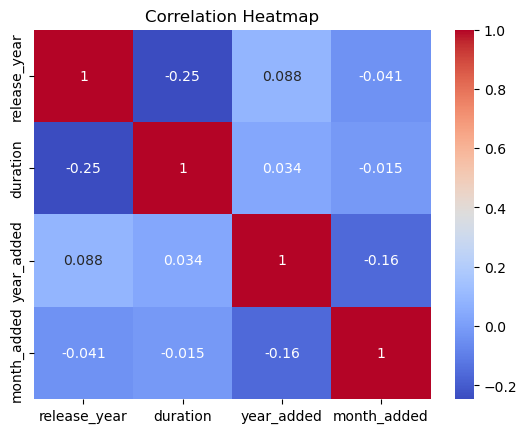

In [91]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [92]:
data_unique['month']=data_unique['date_added'].dt.month
data_unique['year_added']=data_unique['date_added'].dt.year
data_unique

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,9
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9,9
30,TV Show,Kota Factory,unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9,9
74,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,9
122,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89368,Movie,Zinzana,Majid Al Ansari,Ali Suliman,United Arab Emirates,2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016,3,3
89380,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11,11
89391,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,11,11
89398,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,1,1


KeyError: 'week'

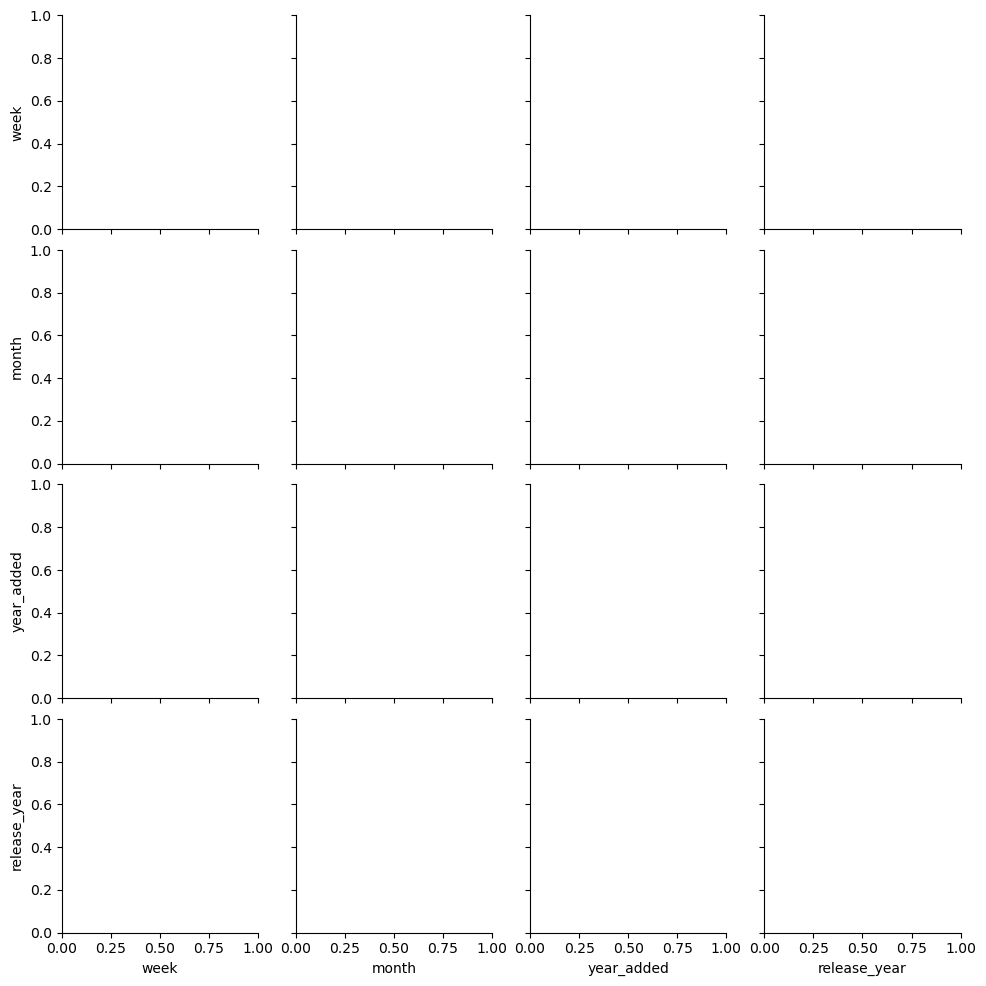

In [93]:
sns.pairplot(data_unique,vars=['week','month','year_added','release_year'],hue='type')

There is a weak correlation between the data suggesting that there is no linear relationship between them

In [ ]:
data['month']=data['date_added'].dt.strftime('%B')
data['week']=data['date_added'].dt.week
month_data=data.groupby(['month','type'])['title'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)
month_data

In [ ]:
movie_month_data=month_data[month_data['type']=='Movie']
movie_month_data

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=movie_month_data,x='month',y='count')
plt.show()

#### Most of the movies are added during the month July so that would be the ideal month for someone to add the movie into Netflix

In [ ]:
tvshow_month_data=month_data[month_data['type']=='TV Show']
tvshow_month_data

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=tvshow_month_data,x='month',y='count')
plt.show()

#### Most of the Tv shows are added during the month December so that would be the ideal month for someone to add the Tv shows into Netflix

In [ ]:
week_data=data.groupby(['week','type'])['title'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)
week_data

In [ ]:
movie_week_data=week_data[week_data['type']=='Movie']
movie_week_data

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=movie_week_data,x='week',y='count',)
plt.show()

#### Most of the movies are added during the week 1 so that would be the ideal week for someone to add the movie into Netflix

In [ ]:
tvshow_week_data=week_data[week_data['type']=='TV Show'].sort_values(by='count')
tvshow_week_data

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=tvshow_week_data,x='week',y='count')
plt.show()

#### Most of the Tv shows are added during the week 27 and also week 30 so that would be the ideal week for someone to add the Tv shows into Netflix

### Genres which are more popular or produced more

In [ ]:
text = ' '.join(data['listed_in'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Genres')
plt.axis('off')
plt.show()

##### The size of each word in the word cloud corresponds to the frequency or importance of the genre.
    1.The word"International Movies" is very prominent,indicating they are common or significant in the dataset.
    2.Genres such as "International TV," "TV Dramas," "Comedies," "Action," "Adventure," "Independent","Family," and "Children" are also quite large, suggesting these are popular or well-represented categories.
    3.There are also mentions of specific types of shows and movies like "TV Kids","Anime","Musicals","Horror," "Sci-Fi," "Romantic," "Thrillers," "Fantasy," and "Documentaries."
    4.The presence of words like "British",  "Spanish" and "Korean" implies the dataset  includes international content.
    5. Smaller words indicate less frequent genres,  but they still contribute to the overall diversity  of the content represented in the word cloud.

### How many days the movie will be added to Netflix after the release of the movie

In [ ]:
data['days_to_add'] = (data['date_added'] - pd.to_datetime(data['release_year'], format='%Y')).dt.days

# Find the mode of 'days_to_add'
mode_days_to_add = data['days_to_add'].mode()[0]

print("Mode of days to add:", mode_days_to_add, "days")


Based on  analysis, it is recommended to add the movie or TV show to the Netflix platform after the **<mark>547 days</mark>** following its release. This timing allows for optimal viewership engagement and ensures that the content is introduced to the audience at a time when interest and anticipation are likely to be highest, thus maximizing its impact and reception.

### Longest Session on netflix

In [ ]:
tvshow_data=data[data['type']=='TV Show']
tvshow_data

In [ ]:
tvshow_data['duration'] = tvshow_data['duration'].str.extract('(\d+)')

# Convert 'duration' column dtype to int
tvshow_data['duration'] = pd.to_numeric(tvshow_data['duration'])



In [ ]:
tvshow_data

In [ ]:
tvshow_data.dtypes

In [ ]:
data_unique = tvshow_data.drop_duplicates(subset='title', keep='first')

# Sort the unique data by duration in descending order
data_unique_sorted = data_unique.sort_values(by='duration', ascending=False)
data_unique_sorted.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=data_unique_sorted.head(10),x='title',y='duration')
plt.show()

Among the plethora of TV shows, **<mark>Grey's Anatomy</mark>** stands out as the undisputed champion, boasting an impressive **<mark>17 seasons</mark>**. This medical drama has captured the hearts of viewers around the world with its compelling storylines and beloved characters. Following closely behind are Supernatural and NCIS, each with an equally impressive run of 15 seasons. These enduring favorites have solidified their places in television history, captivating audiences with their longevity and unwavering popularity.

## Horror Movies and Tv Shows on Netflix

In [ ]:
data_unique = data.drop_duplicates(subset='title', keep='first')
(data_unique["listed_in"].str.contains("Horror")).sum()
((data_unique["listed_in"].str.contains("Horror"))[(data_unique["type"]=="Movie")]).sum()

In [ ]:
((data_unique["listed_in"].str.contains("Horror"))[(data_unique["type"]=="TV Show")]).sum()

In [ ]:
(data_unique["listed_in"].str.contains("Horror")).sum()

##### We can see there are around 286 tv shows and movies under horror category

In [ ]:
data_unique[data_unique["listed_in"].str.contains("Horror")][data_unique["type"]=="TV Show"].head(5) ## The list of 5 TV Shows

In [ ]:
mask = data_unique["listed_in"].str.contains("Horror")
(data_unique[mask]
.groupby("title")
 [['type', 'title', 'country']]
.sum()
.head(10)
) 

## First 10 horror movies

## What is the average duration of the movie


In [ ]:
movie_data=data_unique[data_unique['type']=='Movie']

movie_data['duration'] = movie_data['duration'].str.extract('(\d+)')

# Convert 'duration' column dtype to int
movie_data['duration'] = pd.to_numeric(movie_data['duration'])

movie_data

In [ ]:
movie_data["duration"].mean()

#### The average movie time is around 100 minutes

## Maximum duration of the movie

In [ ]:
movie_data["duration"].max() # Min

In [ ]:
movie_data[movie_data["duration"]==312]

## The longest Movie was Black Mirror Bandersnatch

## Seasons are on Netflix on average per Tv-show

In [ ]:
tvshow_data_unique = tvshow_data.drop_duplicates(subset='title', keep='first')
sort_s= tvshow_data_unique["duration"]!=0
np.round(tvshow_data_unique[sort_s]["duration"].mean())

#### Approximately there are 2 seasons per Tv show in our data

###  The oldest 10 tv series and movies ###

In [ ]:
# the oldest 10 tv series
oldest_tv_series = data_unique[data_unique['type']=="TV Show"][['title','release_year']].sort_values(by="release_year").head(10)
oldest_tv_series

In [ ]:
# the oldest 10 movies
oldest_movies = data_unique[data_unique['type']=="Movie"][['title','release_year']].sort_values(by="release_year").head(10)
oldest_movies

# Based on the insights gathered from Netflix data, here are actionable recommendations for businesses along with inferred patterns.

    Content Strategy Optimization:
    Pattern: The genres "International Movies," comedy, and drama are the most common.
    Inference: The audienceâ€™s needs are diverse; they demand global entertainment and exciting events.
    Recommendation: Make investments into the purchase or production of more foreign movies and domestic drama/comedies with wide audiences.
    
    Personalized Recommendation Algorithms:
    Pattern: Varied durations of content and age ratings.
    Inference: The audiences have different individual choices concerning content duration and maturity ratings.
    Recommendation: Optimize recommendation algorithms to tailor duration and content rating recommendations according to user preferences.
    
    Original Content Creation:
    Pattern: There has been a boost in content production since 2019 reaching a peak in 2018.
    Inference: The market is hungry for exciting and new content.
    Recommendation: Concentrate on crafting exceptional/creative content to attract viewers and to stand out from other competitors.
    
    Targeted Marketing Campaigns:
    Pattern: Poor correlation among the data points.
    Inference: Absence of strong linear relationship between variables.
    Recommendation: Play the targeted marketing campaigns depending on the audience segments and their preferences as well as general trends rather than on general trends.
    
    Data-driven content Strategies:
    Pattern: we can see that the average time where the content is added to the platform after its release is 547 days July and December being the months where the content is added most along with some particular genres
    Inference: The concentration of content addition in July and December aligns with seasonal viewing patterns, likely influenced by factors such as holidays, vacation periods, and colder weather prompting increased indoor entertainment consumption.
    
    Recommendation: Develop a content calendar that strategically aligns with seasonal trends and viewer preferences. Plan thematic releases and promotional campaigns around peak viewing periods, leveraging holidays and cultural events to maximize audience engagement and retention.
    Genre-specific Content Investments:
    
    Pattern: Looking into the genres of Classic & Cult TV and TV Comedies, with TV-MA-rated content being the most common.
    Inference: Some loyal fans, this defines the possibility of niche market funding.
    Recommendation: Specify resources for content production in popular genres with high viewer engagement like Classic TV & Cult TV and TV Comedies to get the best ROI.